# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [15]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [17]:
media_precos = df.groupby('Categoria')['Preco_Normal'].mean().reset_index(name='Media_Preco_Normal')

print(media_precos)

                    Categoria  Media_Preco_Normal
0  belleza-y-cuidado-personal         1783.556485
1          comidas-preparadas         3095.043478
2                  congelados         2108.042553
3                      frutas         1724.473684
4        instantaneos-y-sopas          765.491228
5                     lacteos         2385.219239
6                    verduras         1343.296875


In [19]:
mediana_precos = df.groupby('Categoria')['Preco_Normal'].median().reset_index(name='Mediana_Preco_Normal')

print(mediana_precos)

                    Categoria  Mediana_Preco_Normal
0  belleza-y-cuidado-personal                1569.0
1          comidas-preparadas                3290.0
2                  congelados                1519.0
3                      frutas                1195.0
4        instantaneos-y-sopas                 439.0
5                     lacteos                 989.0
6                    verduras                1180.0


A categoria comidas-preparadas é a única em que a média é menor que a mediana. ​

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [23]:

# Calcular o desvio padrão, média e mediana por categoria
estatisticas = df.groupby('Categoria')['Preco_Normal'].agg(['mean', 'median', 'std'])

# Renomear as colunas para facilitar a leitura
estatisticas.columns = ['Média', 'Mediana', 'Desvio_Padrão']

# Calcular as categorias com maior desvio padrão
maior_desvio = estatisticas.nlargest(5, 'Desvio_Padrão')

print(maior_desvio)

                                  Média  Mediana  Desvio_Padrão
Categoria                                                      
lacteos                     2385.219239    989.0    3925.816164
belleza-y-cuidado-personal  1783.556485   1569.0    2210.041719
congelados                  2108.042553   1519.0    2111.539896
comidas-preparadas          3095.043478   3290.0    2019.911428
frutas                      1724.473684   1195.0    1639.151114


O comportamento identificado nos dados é uma alta variação nos preços normais dentro de algumas categorias, especialmente em lacteos, belleza-y-cuidado-personal, e congelados. Isso é evidenciado pelos altos valores de desvio padrão, indicando que os preços desses produtos variam amplamente.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

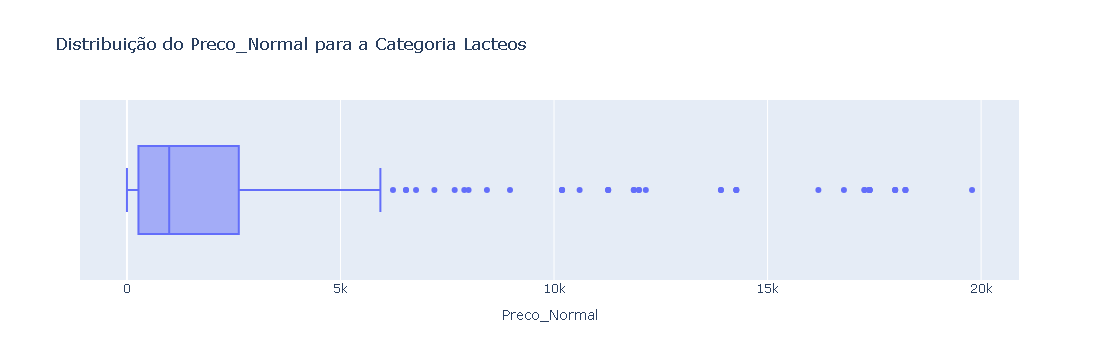

In [30]:
# Filtrar os dados para a categoria com o maior desvio padrão (lacteos)
categoria_maior_desvio = df[df['Categoria'] == 'lacteos']

# Criar o boxplot com plotly.express
fig = px.box(categoria_maior_desvio, x='Preco_Normal', title='Distribuição do Preco_Normal para a Categoria Lacteos')
fig.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

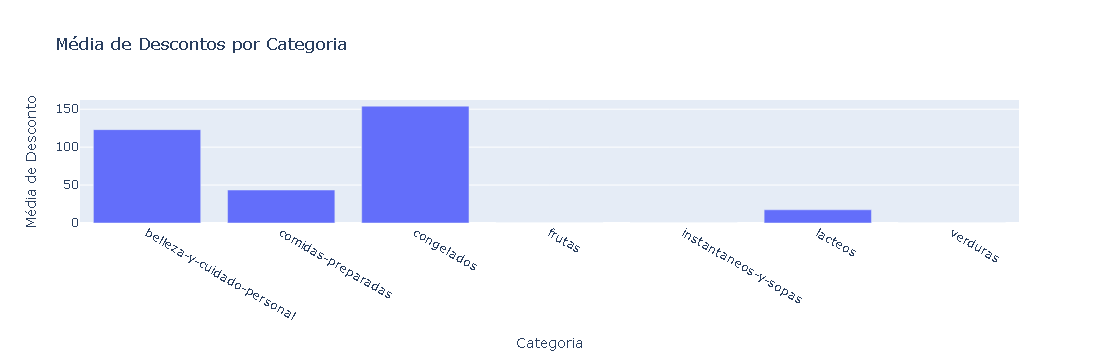

In [34]:
# Calcular a média de descontos por categoria
media_descontos = df.groupby('Categoria')['Desconto'].mean().reset_index()

# Criar o gráfico de barras
fig = px.bar(media_descontos, x='Categoria', y='Desconto', 
             title='Média de Descontos por Categoria',
             labels={'Desconto': 'Média de Desconto', 'Categoria': 'Categoria'})

# Exibir o gráfico
fig.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

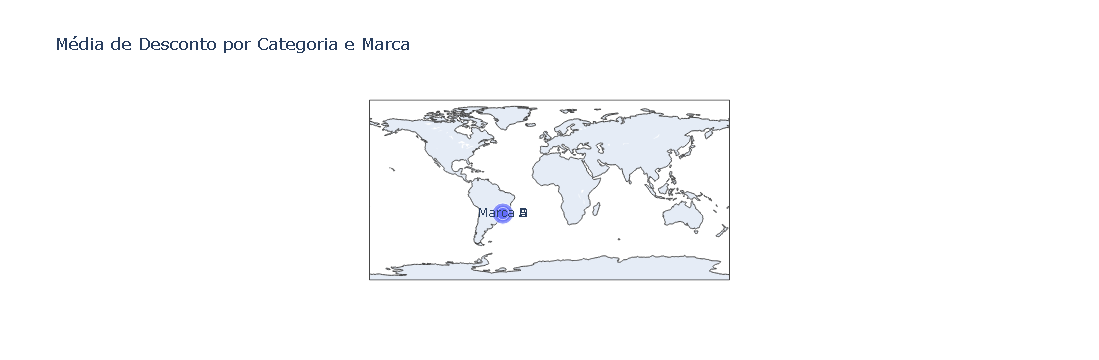

In [42]:
# Criando um DataFrame de exemplo com coordenadas
data = {
    'Categoria': ['Laticínios', 'Beleza', 'Congelados', 'Comidas Preparadas', 'Frutas'],
    'Marca': ['Marca A', 'Marca B', 'Marca C', 'Marca D', 'Marca E'],
    'Desconto': [10, 15, 20, 5, 30],
    'Latitude': [-23.5505, -23.5510, -23.5520, -23.5530, -23.5540],
    'Longitude': [-46.6333, -46.6340, -46.6350, -46.6360, -46.6370]
}

df = pd.DataFrame(data)

# Calcular a média de descontos por categoria e marca
media_descontos = df.groupby(['Categoria', 'Marca'], as_index=False).agg({'Desconto': 'mean'})

# Merge para incluir Latitude e Longitude
media_descontos = media_descontos.merge(df[['Categoria', 'Marca', 'Latitude', 'Longitude']], on=['Categoria', 'Marca'], how='left')

# Criar o gráfico de mapa interativo
fig = px.scatter_geo(media_descontos,
                     lat='Latitude',
                     lon='Longitude',
                     text='Marca',
                     size='Desconto',
                     hover_name='Categoria',
                     title='Média de Desconto por Categoria e Marca',
                     size_max=15,
                     template='plotly')

# Exibir o gráfico
fig.show()